Paul Mooney, October 2017

**Predict Cancer**

**The nucleus is an organelle present within all eukaryotic cells, including human cells.
Abberant nuclear shape can be used to identify cancer cells (e.g. pap smear tests and the diagnosis of cervical cancer).
Likewise, a growing body of literature suggests that there is some connection 
between the shape of the nucleus and human disease states such as cancer and aging.
As such, the quantitative analysis of nuclear size and shape has important biomedical applications.**

For more information, please refer to the following resources:http://www.uwyo.edu/levy_lab/

Vukovic LD, Jevtic P, Edens LJ, Levy DL. (2016) New Insights into Mechanisms and Functions of Nuclear Size Regulation. Int Rev Cell Mol Biol. 322:1–59.

Webster, M., Witkin, K.L., and Cohen-Fix, O. (2009). Sizing up the nucleus: nuclear shape, size and nuclear-envelope assembly. J. Cell Sci. 122, 1477–1486.

Zink, D., Fischer, A.H., and Nickerson, J.A. (2004). Nuclear structure in cancer cells. Nat. Rev. Cancer 4, 677–687.

Webster, M., Witkin, K.L., and Cohen-Fix, O. (2009). Sizing up the nucleus: nuclear shape, size and nuclear-envelope assembly. J. Cell Sci. 122, 1477–1486.


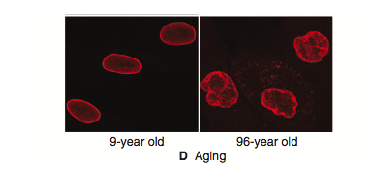

In [1]:
# Plot Image
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
image_name = "/kaggle/input/webster-2009/webster 2009.png" #Image to be used as query
def plotNuclei(image_location):
    image = cv2.imread(image_name)
    #image = cv2.resize(image, (512,512))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)); plt.axis('off')
    return
plotNuclei(image_name)

print("Webster, M., Witkin, K.L., and Cohen-Fix, O. (2009). Sizing up the nucleus: nuclear shape, size and nuclear-envelope assembly. J. Cell Sci. 122, 1477–1486.")

Technicians can use a microscope to observe tissue samples that were taken from patients who are suspected to have breast cancer.  By looking at the size and shape of the nuclei present within these tissue samples, doctors can determine whether a given sample appears to be benign ("B") or malignant ("M").  It would be hepful to have an automated method that can quickly determine if a sample is benign or malignant.  Here in this document I demonstrate a methodology to predict if a sample is benign or malignant given measurements of nuclear shape that were made from digital images of fine needle aspirates of breast tissue masses from clinical samples.

This Python 3 script takes as an input the CSV file from the Kaggle Breast Cancer Wisconsin Dataset (https://www.kaggle.com/uciml/breast-cancer-wisconsin-data). The output of this script is a prediction of whether a given patient has a tumor that is benign ("B") or malignant ("M").





In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
trainingData = pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')

def describeData(input):
    """ printColumnTitles"""  
    print('')
    print('Column Values:')
    print('')
    print(input.columns.values)
    print('')
    print('First Few Values:')
    print('')
    print(input.head())
    print('')
    print('Null Value Counts:')
    print('')
    print(input.isnull().sum())
    return
describeData(trainingData)


Column Values:

['id' 'diagnosis' 'radius_mean' 'texture_mean' 'perimeter_mean' 'area_mean'
 'smoothness_mean' 'compactness_mean' 'concavity_mean'
 'concave points_mean' 'symmetry_mean' 'fractal_dimension_mean' 'radius_se'
 'texture_se' 'perimeter_se' 'area_se' 'smoothness_se' 'compactness_se'
 'concavity_se' 'concave points_se' 'symmetry_se' 'fractal_dimension_se'
 'radius_worst' 'texture_worst' 'perimeter_worst' 'area_worst'
 'smoothness_worst' 'compactness_worst' 'concavity_worst'
 'concave points_worst' 'symmetry_worst' 'fractal_dimension_worst'
 'Unnamed: 32']

First Few Values:

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402 

Abberant nuclear shape can be used to identify cancer cells (e.g. pap smear tests and the diagnosis of cervical cancer).
Likewise, a growing body of literature suggests that there is some connection between the shape of the nucleus and human disease states such as cancer and aging.

Next I will compare the sizes of the nuclei from malignant samples to the sizes of the nuclei from benign samples.

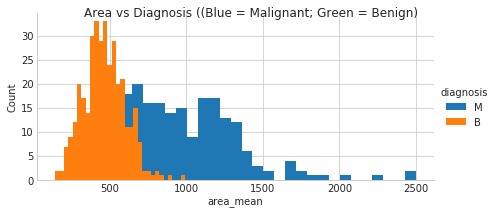

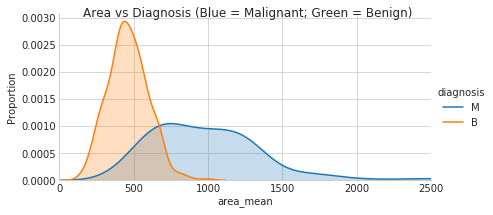

In [3]:
def plotSizeDistribution(input):
    """ 
    Plot size distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'area_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('area_mean', 'Count')
    distributionOne.fig.suptitle('Area vs Diagnosis ((Blue = Malignant; Green = Benign)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'area_mean',shade= True)
    distributionTwo.set(xlim=(0, input['area_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('area_mean', 'Proportion')
    distributionTwo.fig.suptitle('Area vs Diagnosis (Blue = Malignant; Green = Benign)')

    return

plotSizeDistribution(trainingData)

This confirms my prediction that healthy nuclei have a default size and that cancer cells have a wide range of sizes, typically greater than the default size.

In addition to being larger than healthy cells, cancer cells are often mishapen.

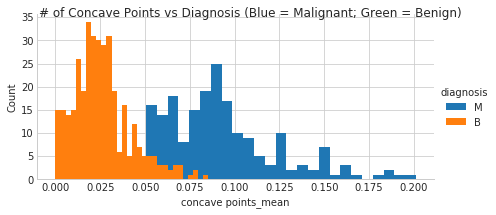

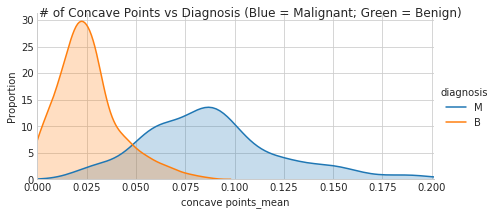

In [4]:
def plotConcaveDistribution(input):
    """ 
    Plot concave distribution
    """  
    sns.set_style("whitegrid")
    distributionOne = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionOne.map(plt.hist, 'concave points_mean', bins=30)
    distributionOne.add_legend()
    distributionOne.set_axis_labels('concave points_mean', 'Count')
    distributionOne.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Green = Benign)')
    distributionTwo = sns.FacetGrid(input, hue="diagnosis",aspect=2)
    distributionTwo.map(sns.kdeplot,'concave points_mean',shade= True)
    distributionTwo.set(xlim=(0, input['concave points_mean'].max()))
    distributionTwo.add_legend()
    distributionTwo.set_axis_labels('concave points_mean', 'Proportion')
    distributionTwo.fig.suptitle('# of Concave Points vs Diagnosis (Blue = Malignant; Green = Benign)')

    return

plotConcaveDistribution(trainingData)

This confirms my prediction that healthy nuclei are typically circular/elliptical and that cancer cells are mishapen and have lots of concave points.

Next I will pre-process the data so that it is ready for analysis.  First I will convert the labels "B" and "M" to 0 and 1, respectively.
Next I will scale the values by using the sklearn.preprocessing.scale function which functions by subtracting the mean and then dividing by the standard deviation in order to generate values that are centered around zero.  You can learn more about the sklearn.preprocessing.scale function at the following link: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html 

By doing this we will have data with numerical Y values and X values that are centered around zero.  This type of data is compatible with a wide variety of different classification algorithms.


In [5]:
from sklearn import preprocessing

def diagnosisToBinary(input):
    """ 
    convert diagnosis to binary label
    """ 
    input["diagnosis"] = input["diagnosis"].astype("category")
    input["diagnosis"].cat.categories = [0,1]
    input["diagnosis"] = input["diagnosis"].astype("int")
diagnosisToBinary(trainingData)

xValues = trainingData.drop(['diagnosis', 'Unnamed: 32', 'id'], axis=1)
yValues = trainingData['diagnosis']
xValuesScaled = preprocessing.scale(xValues)
xValuesScaled = pd.DataFrame(xValuesScaled, columns = xValues.columns)



Another data preprocessing step that we can do is Principal Component Analysis (PCA).  With PCA we transform our features to make them less correlated  via a process that involves dimensionality reduction.  For more information, see the following documentaion: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html, http://scikit-learn.org/stable/modules/decomposition.html#pca



In [6]:
from sklearn.decomposition import PCA
# Minimum percentage of variance we want to be described by the resulting transformed components
variance_pct = .99
# Create PCA object
pca = PCA(n_components=variance_pct)
# Transform the initial features
X_transformed = pca.fit_transform(xValuesScaled,yValues)
# Create a data frame from the PCA'd data
pcaDataFrame = pd.DataFrame(X_transformed) 
#print(pcaDataFrame.shape[1], " components describe ", str(variance_pct)[1:], "% of the variance")
# Redefine X_train, X_test, Y_train, Y_test
xValuesScaledPCA = pcaDataFrame

In [7]:
print('First Few Values, Original:')
print('')
print(xValues.head())
print('')
print('First Few Values, Scaled:')
print('')
print(xValuesScaled.head())
print('')
print('First Few Values, After PCA:')
print('')
print(xValuesScaledPCA.head())
print('')

First Few Values, Original:

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean           ...             radius_wors

We will need to split up our training data, setting aside 20% of the training data for cross-validation testing, such that we can avoid potentially overfitting the data.  The train_test_split function accomplishes this, as described in the following documentation:
http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
http://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

In [8]:
from sklearn.model_selection import train_test_split

X_trainOriginal, X_testOriginal, Y_trainOriginal, Y_testOriginal = train_test_split(xValues, yValues, test_size=0.2)
X_trainScaled, X_testScaled, Y_trainScaled, Y_testScaled = train_test_split(xValuesScaled, yValues, test_size=0.2)
X_trainScaledPCA, X_testScaledPCA, Y_trainScaledPCA, Y_testScaledPCA = train_test_split(xValuesScaledPCA, yValues, test_size=0.2)

Now I will try running a few different classification algorithms such as Logistic Regression and Support Vector Machines.  I will do this both with and without the data scaling step in order to illustrate the importance of this preprocessing step.

Before Data Scaling:


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.912121 (0.088035)
RF: 0.903030 (0.083044)
KNN: 0.912121 (0.078085)
SVM: 0.631818 (0.151257)
LSVM: 0.800758 (0.260634)
GNB: 0.912121 (0.078085)
DTC: 0.918939 (0.075458)
GBC: 0.859091 (0.079974)


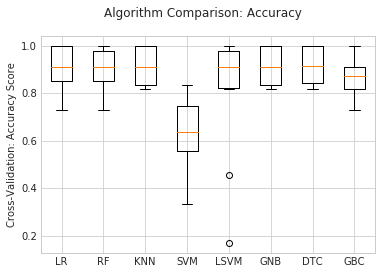


After Data Scaling:


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.928788 (0.087315)
RF: 0.929545 (0.078806)
KNN: 0.928030 (0.079111)
SVM: 0.918939 (0.094867)
LSVM: 0.912121 (0.066667)
GNB: 0.937121 (0.070747)
DTC: 0.964394 (0.043658)
GBC: 0.938636 (0.040294)


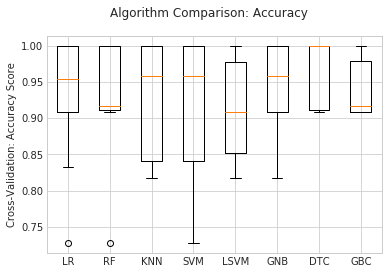


After PCA:


Compare Multiple Classifiers:

K-Fold Cross-Validation Accuracy:

LR: 0.982576 (0.034890)
RF: 0.940152 (0.075564)
KNN: 0.974242 (0.039394)
SVM: 0.957576 (0.077273)
LSVM: 0.982576 (0.034890)
GNB: 0.921212 (0.103386)
DTC: 0.850758 (0.086314)
GBC: 0.877273 (0.093511)


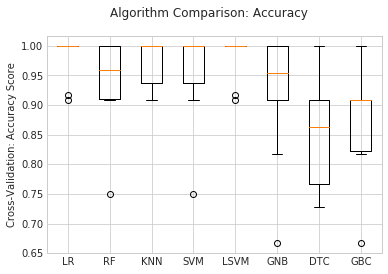


LR = LogisticRegression
RF = RandomForestClassifier
KNN = KNeighborsClassifier
SVM = Support Vector Machine SVC
LSVM = LinearSVC
GNB = GaussianNB
DTC = DecisionTreeClassifier
GBC = GradientBoostingClassifier



In [9]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

def compareABunchOfDifferentModelsAccuracy(a, b, c, d):
    """
    compare performance of classifiers on X_train, X_test, Y_train, Y_test
    http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
    http://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score
    """    
    print('')
    print('Compare Multiple Classifiers:')
    print('')
    print('K-Fold Cross-Validation Accuracy:')
    print('')
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
        
    resultsAccuracy = []
    names = []
    for name, model in models:
        model.fit(a, b)
        kfold = model_selection.KFold(n_splits=10, random_state=7)
        accuracy_results = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
        resultsAccuracy.append(accuracy_results)
        names.append(name)
        accuracyMessage = "%s: %f (%f)" % (name, accuracy_results.mean(), accuracy_results.std())
        print(accuracyMessage)

    
    # boxplot algorithm comparison
    fig = plt.figure()
    fig.suptitle('Algorithm Comparison: Accuracy')
    ax = fig.add_subplot(111)
    plt.boxplot(resultsAccuracy)
    ax.set_xticklabels(names)
    ax.set_ylabel('Cross-Validation: Accuracy Score')
    plt.show()
    return


print("Before Data Scaling:")
print("")
compareABunchOfDifferentModelsAccuracy(X_trainOriginal, Y_trainOriginal, X_testOriginal, Y_testOriginal)
print("")
print("After Data Scaling:")
print("")
compareABunchOfDifferentModelsAccuracy(X_trainScaled, Y_trainScaled, X_testScaled, Y_testScaled)
print("")
print("After PCA:")
print("")
compareABunchOfDifferentModelsAccuracy(X_trainScaledPCA, Y_trainScaledPCA, X_testScaledPCA, Y_testScaledPCA)

def defineModels():
    """
    This function just defines each abbreviation used in the previous function (e.g. LR = Logistic Regression)
    """
    print('')
    print('LR = LogisticRegression')
    print('RF = RandomForestClassifier')
    print('KNN = KNeighborsClassifier')
    print('SVM = Support Vector Machine SVC')
    print('LSVM = LinearSVC')
    print('GNB = GaussianNB')
    print('DTC = DecisionTreeClassifier')
    print('GBC = GradientBoostingClassifier')
    #print('LDA = LinearDiscriminantAnalysis')
    print('')
    return

defineModels()

These classification algorithms work well (i.e. ~90% accuracy) both with or without the data scaling step and with or without the PCA.

Next I will try using neural networks in order to make these same predictions.  I predict that with the neural networks I will get better performance using the scaled data with PCA.  One reason why it is helpful to use the PCA is because it reduces correlations between different variables, as illustrated below.

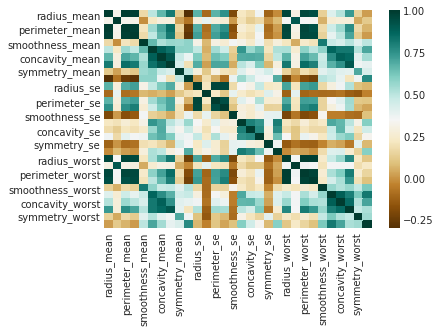

In [10]:
g = sns.heatmap(X_trainOriginal.corr(),cmap="BrBG",annot=False)

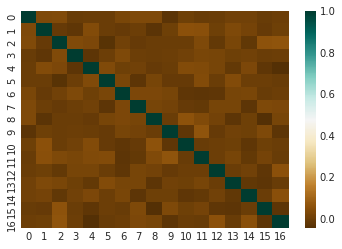

In [11]:
i = sns.heatmap(X_trainScaledPCA.corr(),cmap="BrBG",annot=False)


Next I will try using neural networks in order to make these same predictions.  

In [12]:
# First we will use the Multi-layer Perceptron NN model from Sklearn
from sklearn.neural_network import MLPClassifier as MLPC
def runMLPC(a,b,c,d):
    classifier = MLPC(activation='relu', max_iter=1000)
    classifier.fit(a, b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(classifier, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('SKlearn Multi-layer Perceptron NN - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')

print("Before Data Scaling:")
print("")
runMLPC(X_trainOriginal, Y_trainOriginal,  X_testOriginal, Y_testOriginal)
print("After Data Scaling:")
print("")
runMLPC(X_trainScaled, Y_trainScaled,  X_testScaled, Y_testScaled)
print("After PCA:")
print("")
runMLPC(X_trainScaledPCA, Y_trainScaledPCA,  X_testScaledPCA, Y_testScaledPCA)


Before Data Scaling:

SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.47803030303 (0.223874852306)

After Data Scaling:

SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.937878787879 (0.0685846684713)

After PCA:

SKlearn Multi-layer Perceptron NN - Training set accuracy: 0.982575757576 (0.0348896331505)



For the MLP neural network, scaling was important but PCA was not.  Next I will try building some custom neural networks using the Keras library.


In [13]:
# We will build some custom neural networks using keras
# https://keras.io/models/sequential/
from __future__ import print_function
from keras.models import Sequential
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Activation, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier

def runSimpleKeras(a,b,c,d):
    """ Build and run Two different NNs using Keras"""
    global kerasModelOne # eventually I should get rid of these global variables and use classes instead.  in this case i need these variables for the submission function.
    # Let's start out with a simple network consisting of only two fully connected layers.
    Adagrad(lr=0.00001, epsilon=1e-08, decay=0.0)
    model = Sequential()
    model.add(Dense(input_dim=np.array(a).shape[1], units=128, kernel_initializer='normal', bias_initializer='zeros'))
    model.add(Activation('relu'))
    model.add(Dense(units=1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='Adagrad', metrics=['accuracy'])
    model.fit(np.array(a), np.array(b), epochs=10, verbose=2, validation_split=0.2)
    score = model.evaluate(np.array(c),np.array(d), verbose=0)
    print('')
    print('Loss, Accuracy:')
    print(score)
    kerasModelOne = model  
    return kerasModelOne
print("")
print("Before Data Scaling:")
print("")
runSimpleKeras(X_trainOriginal,Y_trainOriginal,X_testOriginal,Y_testOriginal)
print("")
print("After Data Scaling:")
print("")
runSimpleKeras(X_trainScaled,Y_trainScaled,X_testScaled,Y_testScaled)
print("")
print("After PCA:")
print("")
runSimpleKeras(X_trainScaledPCA,Y_trainScaledPCA,X_testScaledPCA,Y_testScaledPCA)



Using TensorFlow backend.
/opt/conda/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)



Before Data Scaling:

Train on 364 samples, validate on 91 samples
Epoch 1/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 2/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 3/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 4/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 5/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 6/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 7/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 8/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 9/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484
Epoch 10/10
0s - loss: 6.1107 - acc: 0.6209 - val_loss: 5.6679 - val_acc: 0.6484

Loss, Accuracy:
[5.9382457733154297, 0.63157894632272549]

After Data Scaling:

Train on 364 samples, validate on 91 samples
Epoch

Now with the neural network we are getting 98% accuracy in the task of diagnosing "Malignant" or "Benign".  For this neural network, we had much better accuracy after performing the data scaling step but only marginally better accuracy after performing the PCA.

This is our highest score.  We can stop here and use the Keras classifier with 98% accuracy if we want the best score.
For the rest of this document I will just continue comparing and contrasting the different classification methods.

With accuracy rates this high it is also wise to be wary of overfitting the training data.  I tried to avoid overfitting the training data by setting aside 20% of the data for cross-validation.  Next I will confirm that I did not overfit the data by plotting learning curves where I illustrate the relationship between the accuracy score and the cross validation score for increasing sample sizes.


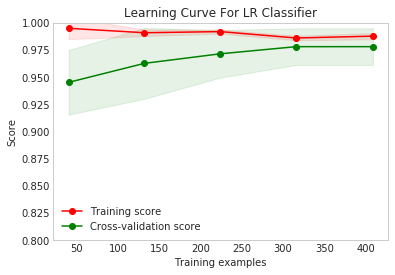

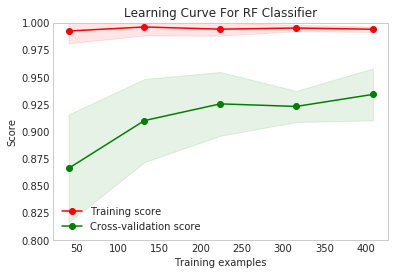

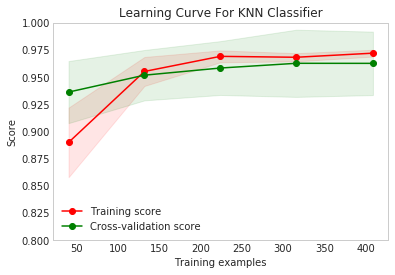

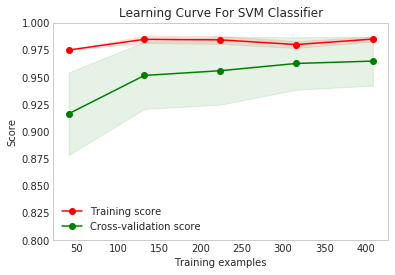

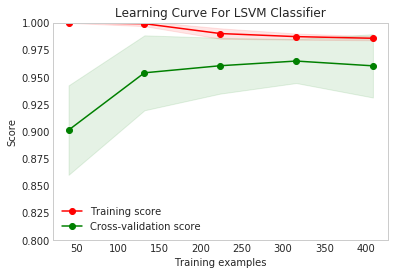

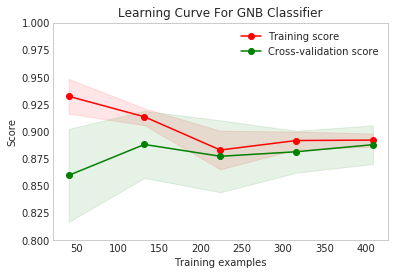

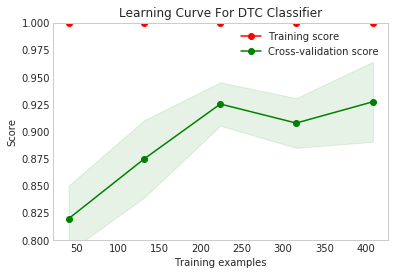

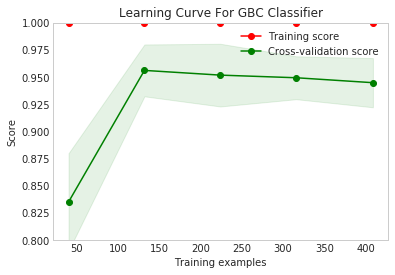

In [14]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Plots a learning curve. http://scikit-learn.org/stable/modules/learning_curve.html
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt



def plotLotsOfLearningCurves(a,b):
    """Now let's plot a bunch of learning curves
    # http://scikit-learn.org/stable/modules/learning_curve.html
    """
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('SVM', SVC()))
    models.append(('LSVM', LinearSVC()))
    models.append(('GNB', GaussianNB()))
    models.append(('DTC', DecisionTreeClassifier()))
    models.append(('GBC', GradientBoostingClassifier()))
    #models.append(('LDA', LinearDiscriminantAnalysis()))
    #models.append(('MLP', MLPC()))
    #models.append(('Keras', kerasModelOne()))
    for name, model in models:
        plot_learning_curve(model, 'Learning Curve For %s Classifier'% (name), a,b, (0.8,1), 10)

plotLotsOfLearningCurves(X_trainScaledPCA, Y_trainScaledPCA)

If there is too big of a gap between the two curves the model likely has high bias.  If there is too little of a gap between the two curves the model likely is overfit.  We want a learning curve where the cross-validation score gets close to converging with the training score but does not quite converge.  The learning curve for Support Vector Machine looks pretty good.  Let's explore the Support Vector Machine approach in a little more detail.

Selected Parameters for SVM:

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Support Vector Machine - Training set accuracy: 0.974242424242 (0.0393939393939)



<module 'matplotlib.pyplot' from '/opt/conda/lib/python3.6/site-packages/matplotlib/pyplot.py'>

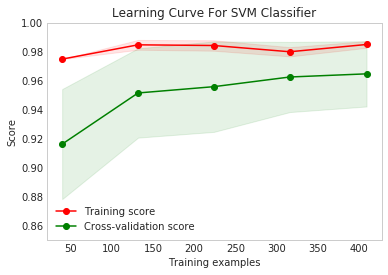

In [15]:
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV

def selectParametersForSVM(a, b, c, d):
    """http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
    http://scikit-learn.org/stable/modules/grid_search.html#grid-search"""
    model = SVC()
    parameters = {'C': [0.00001, 0.001, .01, 0.1, 0.5, 1.0, 5.0, 10, 25, 50, 100, 1000], 'kernel':  ['linear', 'poly', 'rbf', 'sigmoid']}
    accuracy_scorer = make_scorer(accuracy_score)
    grid_obj = GridSearchCV(model, parameters, scoring=accuracy_scorer)
    grid_obj = grid_obj.fit(a, b)
    model = grid_obj.best_estimator_
    model.fit(a, b)
    print('Selected Parameters for SVM:')
    print('')
    print(model)
    print('')
#    predictions = model.predict(c)
#    print(accuracy_score(d, predictions))
#    print('Logistic Regression - Training set accuracy: %s' % accuracy_score(d, predictions))
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c, d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
    return
selectParametersForSVM(X_trainScaledPCA, Y_trainScaledPCA, X_testScaledPCA, Y_testScaledPCA)
plot_learning_curve(SVC(), 'Learning Curve For SVM Classifier', X_trainScaledPCA, Y_trainScaledPCA, (0.85,1), 10)


With the Support Vector Machine approach we are getting 95% accuracy and based off of the learning curves it looks like we are not overfitting too much either.  Next I will plot a confusion matrix for the results that were produced by the Support Vector Machine.

Confusion matrix, without normalization
[[70  0]
 [ 1 43]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.02  0.98]]


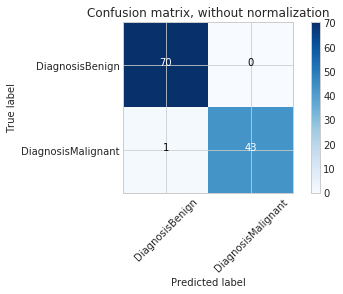

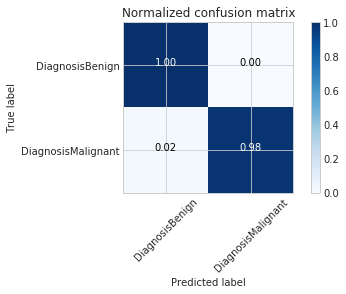

Support Vector Machine - Training set accuracy: 0.974242424242 (0.0393939393939)



In [16]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


# First Make a Prediction
from sklearn.metrics import confusion_matrix
import itertools
model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
model.fit(X_trainScaledPCA, Y_trainScaledPCA)
prediction = model.predict(X_testScaledPCA)

# Now plot the confusion matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_testScaledPCA, prediction)
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
class_names = ["Diagnosis" "Benign", "Diagnosis" "Malignant"]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.show()


#Run LR
def runSVC(a,b,c,d):
    """Run LR w/ Kfold CV"""
    model = SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
    model.fit(a,b)
    kfold = model_selection.KFold(n_splits=10)
    accuracy = model_selection.cross_val_score(model, c,d, cv=kfold, scoring='accuracy')
    mean = accuracy.mean() 
    stdev = accuracy.std()
    print('Support Vector Machine - Training set accuracy: %s (%s)' % (mean, stdev))
    print('')
runSVC(X_trainScaledPCA, Y_trainScaledPCA, X_testScaledPCA, Y_testScaledPCA)

My apologies to the two patients with malignant tumors who were told that their tumors were benign.  Besides that, we were consistently accurate.  97% accuracy is pretty good! 

The neural network that I build using Keras had the best score, though.

In [17]:
runSimpleKeras(X_trainScaledPCA,Y_trainScaledPCA,X_testScaledPCA,Y_testScaledPCA)


Train on 364 samples, validate on 91 samples
Epoch 1/10
0s - loss: 0.4017 - acc: 0.9066 - val_loss: 0.2053 - val_acc: 1.0000
Epoch 2/10
0s - loss: 0.1933 - acc: 0.9725 - val_loss: 0.1300 - val_acc: 1.0000
Epoch 3/10
0s - loss: 0.1410 - acc: 0.9753 - val_loss: 0.0979 - val_acc: 1.0000
Epoch 4/10
0s - loss: 0.1166 - acc: 0.9753 - val_loss: 0.0808 - val_acc: 1.0000
Epoch 5/10
0s - loss: 0.1015 - acc: 0.9753 - val_loss: 0.0689 - val_acc: 1.0000
Epoch 6/10
0s - loss: 0.0913 - acc: 0.9753 - val_loss: 0.0647 - val_acc: 1.0000
Epoch 7/10
0s - loss: 0.0845 - acc: 0.9780 - val_loss: 0.0625 - val_acc: 0.9890
Epoch 8/10
0s - loss: 0.0791 - acc: 0.9780 - val_loss: 0.0587 - val_acc: 0.9890
Epoch 9/10
0s - loss: 0.0749 - acc: 0.9780 - val_loss: 0.0561 - val_acc: 0.9890
Epoch 10/10
0s - loss: 0.0712 - acc: 0.9780 - val_loss: 0.0559 - val_acc: 0.9890

Loss, Accuracy:
[0.058517131366227805, 0.9736842063435337]


Alternatively, we can get 96% accuracy with the neural network.  Earlier I got 99% a

In the future, tools like this can be used to save time, cut costs, and increase the accuracy of imaging-based diagnostic approaches in the healthcare industry.